# Introduction
Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

## Background Information

This report analyzes medical charges incurred by patients based on features such as age, gender, and medical history. The goal is to develop a predictive model that accurately estimates healthcare costs, aiding providers in budgeting and resource allocation.

## Overview & Data Understanding

### Overview

This project aims to predict medical charges incurred by patients using various demographic and health-related features. Understanding the factors influencing medical costs is essential for healthcare providers and insurers to make informed decisions regarding pricing, resource allocation, and policy formulation.

## Dataset Description

Source: The dataset is sourced from [https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction].
Size: The dataset contains 1,338 rows and 7 columns, representing various attributes of patients.

## Features Overview

### Target Variable:

charges: The total medical charges incurred by patients.

### Predictor Variables:

age: Patient's age (numerical).

sex: Patient's gender (categorical: male/female).

bmi: Body Mass Index (numerical).

children: Number of children/dependents covered by insurance (numerical).

smoker: Smoking status (categorical: yes/no).

region: Geographic region of the patient (categorical).

# Data Types and Missing Values

The dataset includes both numerical and categorical features.

Initial checks indicate that there are no missing values in the dataset.
Exploratory Data Analysis (EDA)

Summary statistics reveal key insights into the distributions of numerical features.

Visualizations such as histograms and box plots illustrate the distribution of medical charges and highlight potential outliers.

A correlation analysis indicates relationships between features, particularly noting that age and BMI have positive correlations with medical charges.

# Key Insights

From the exploratory analysis, we observe:


A significant positive correlation between age and medical charges.

Smokers tend to incur higher medical charges compared to non-smokers.

The distribution of medical charges is right-skewed, indicating that a small number of patients incur significantly higher costs.

Conclusion & Next Steps

This overview provides a foundational understanding of the dataset. The next steps involve feature engineering, model selection, and training predictive models to further analyze the factors influencing medical charges.

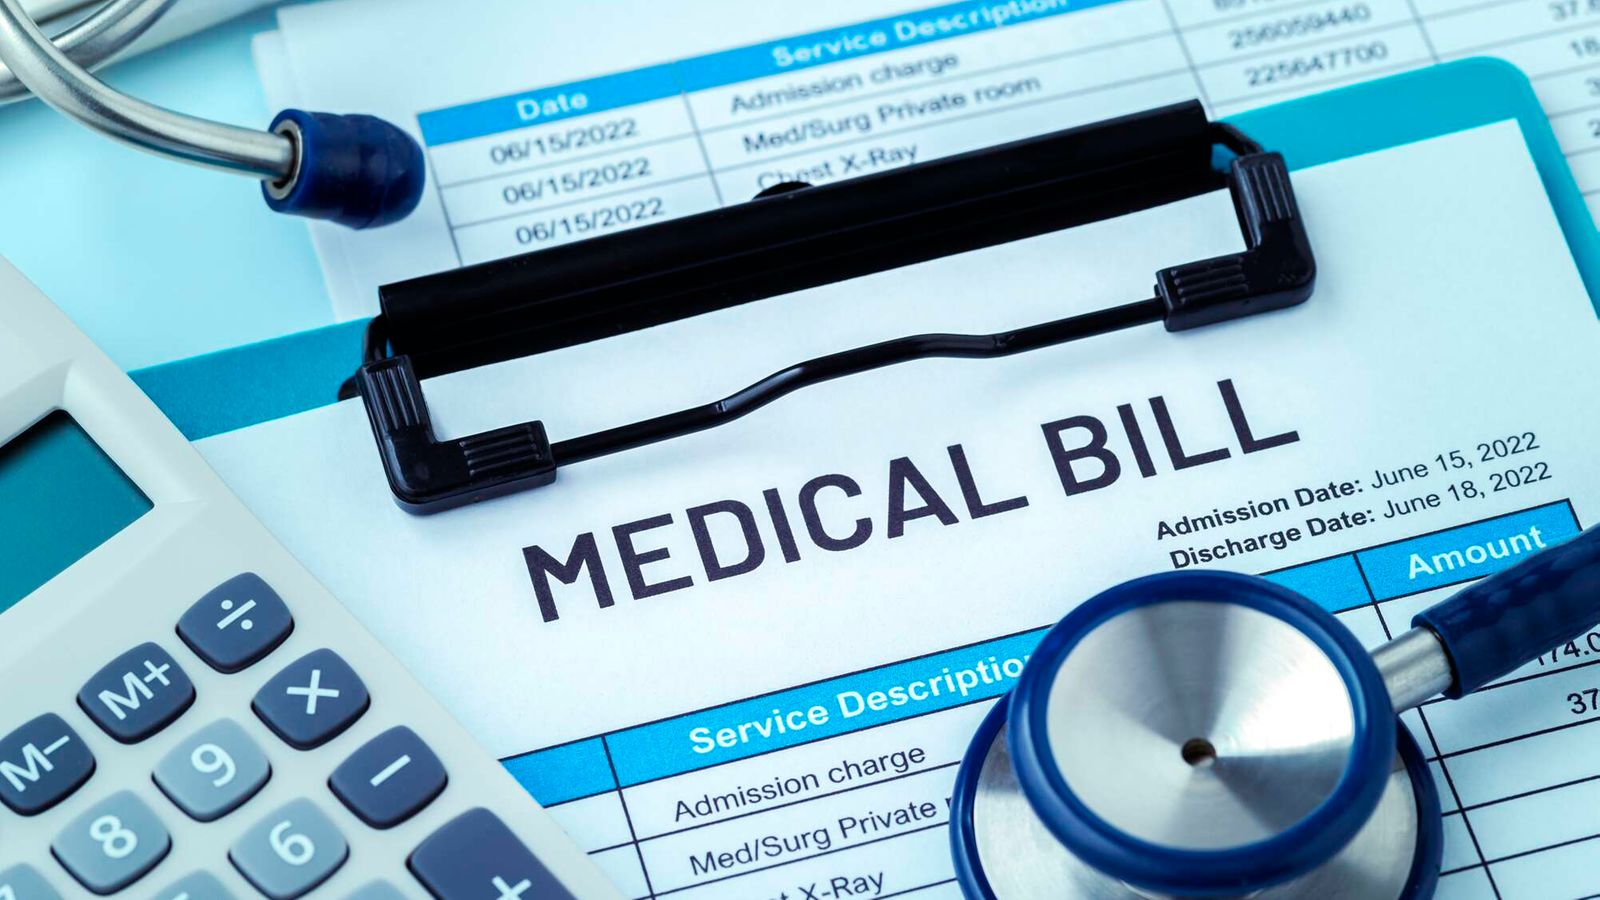

# Step 1: Importing Libraries and Loading the Dataset

1.1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1.2: Loading the Dataset

In [2]:
df = pd.read_csv('../content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Step 2: Data Types and Basic Statistics

In [3]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [4]:
# Get descriptive statistics of the DataFrame
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Check for missing values in each column
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Step 3:Exploratory Data Analysis (EDA)

## 1. Data Visualization

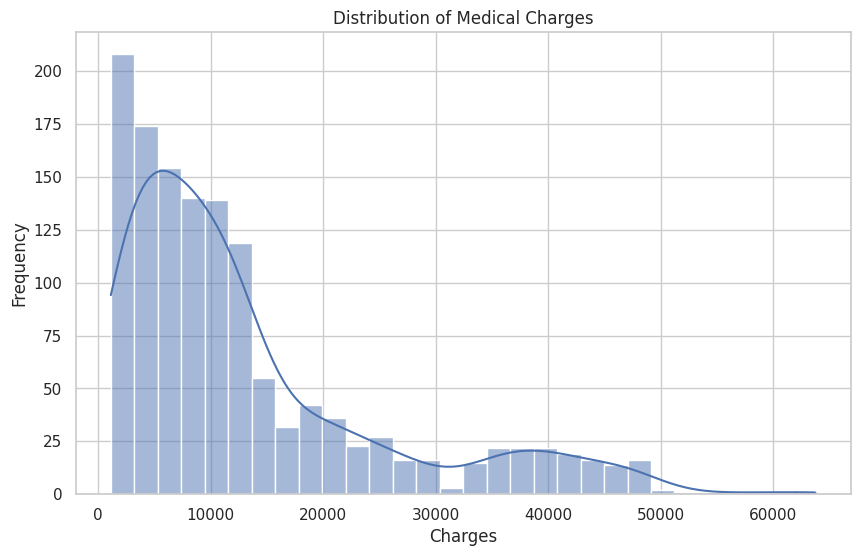

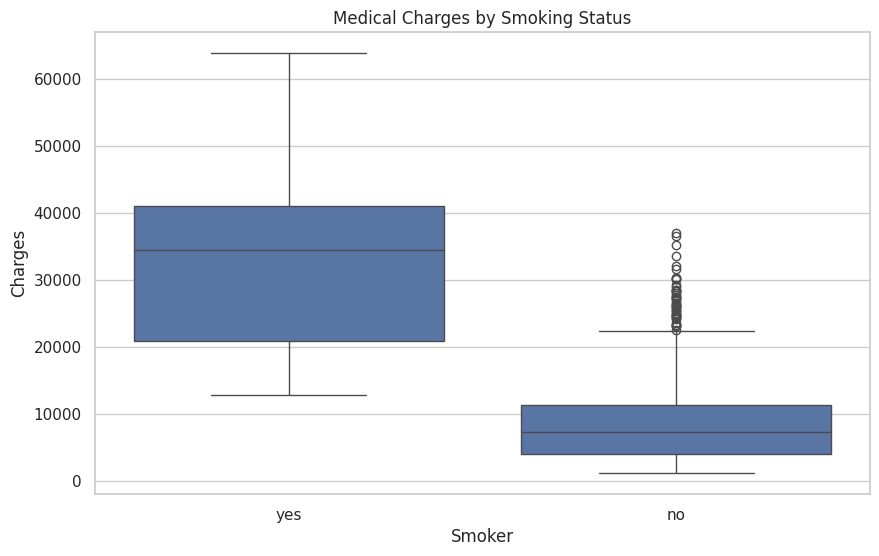

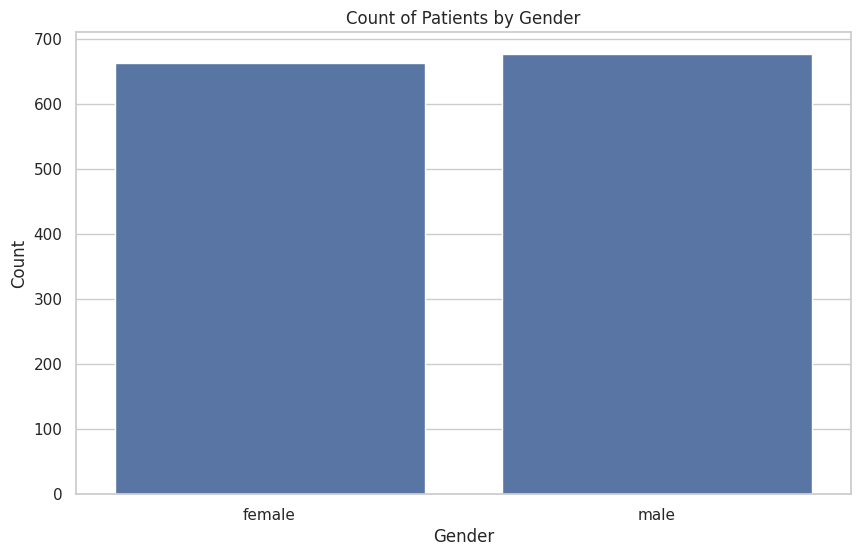

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram of medical charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Box plot of charges by smoking status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Medical Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Count plot for sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Count of Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The histogram displays the distribution of medical charges. The presence of a peak at lower charge values and a long tail towards higher charges indicates a right-skewed distribution. This suggests that while most patients incur relatively low costs, a small number incur significantly higher costs, which is common in medical billing.

This box plot compares medical charges for smokers versus non-smokers. The median charge for smokers is typically higher than that for non-smokers, as indicated by the box plot's central line. Additionally, the presence of outliers in the smoker category suggests that some smokers incur exceptionally high medical charges.

The count plot illustrates the distribution of patients by gender. It shows how many males and females are represented in the dataset. This information can be useful for understanding demographic representation and potential biases in medical charges based on gender.

## 2. Descriptive Statistics

In [7]:
# Summary statistics for numerical features
summary_statistics = df.describe()
print(summary_statistics)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


The summary statistics provide key metrics such as mean, standard deviation, minimum, maximum, and quartiles for numerical features (age, bmi, children, charges).

For instance:

The mean charge is around $13,270, indicating the average cost incurred by patients.

The standard deviation shows variability in charges; a high standard deviation relative to the mean suggests that while many patients have low costs, a few have very high costs.

## 3. Correlation Analysis

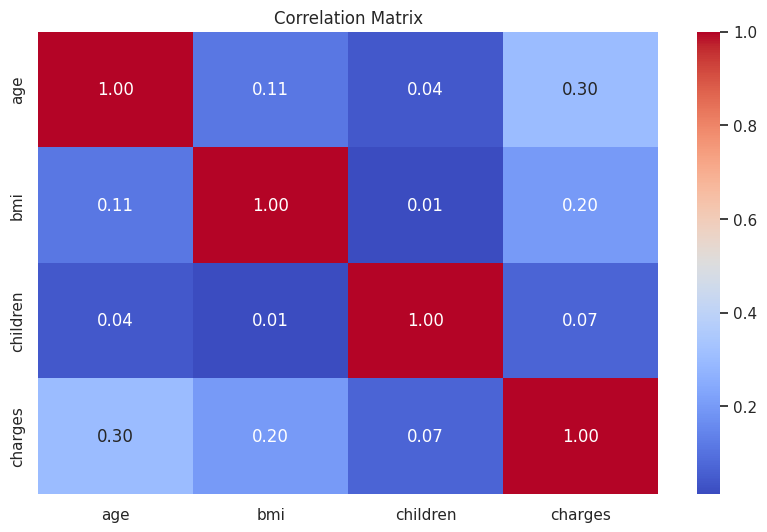

In [9]:
# Correlation matrix
correlation_matrix = df.select_dtypes(include=np.number).corr() # Select only numeric columns for correlation calculation

# Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

A strong positive correlation between age and charges, indicating that older patients tend to incur higher medical costs.

A moderate positive correlation between bmi and charges, suggesting that higher BMI may also be associated with increased medical expenses.

## 1. Univariate Analysis

Descriptive Statistics

We will calculate descriptive statistics for all numerical features.

In [10]:
# Descriptive statistics for all numerical features
univariate_stats = df.describe()
print(univariate_stats)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


## 2. Bivariate Analysis

Scatter Plot: Age vs. Charges

This scatter plot will help visualize the relationship between age and medical charges.

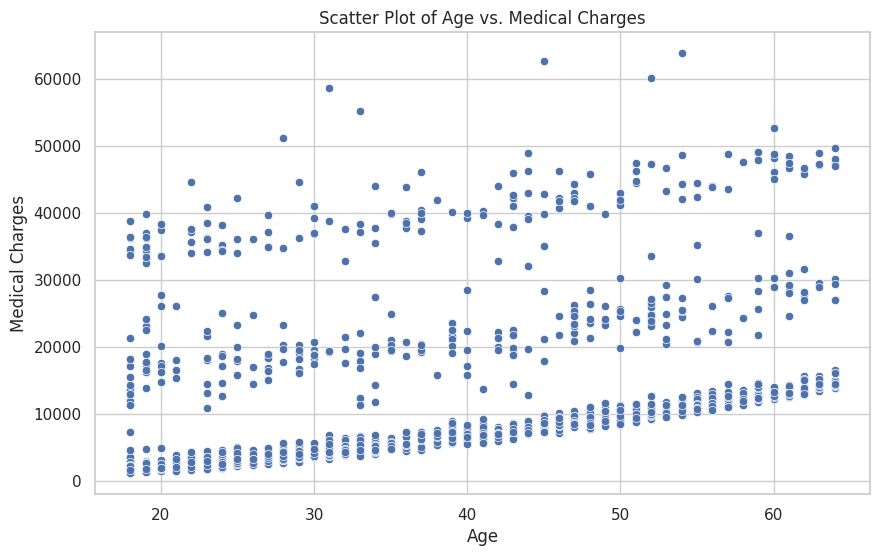

In [11]:
# Scatter plot of age vs. charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Scatter Plot of Age vs. Medical Charges')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.show()

Correlation Coefficients

We can calculate the correlation coefficients to quantify the strength of relationships.

In [13]:
# Correlation coefficients
correlation_coefficients = df.select_dtypes(include=np.number).corr() # Select only numeric columns for correlation calculation
print(correlation_coefficients['charges'].sort_values(ascending=False))

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


## 3. Multivariate Analysis

Pair Plot

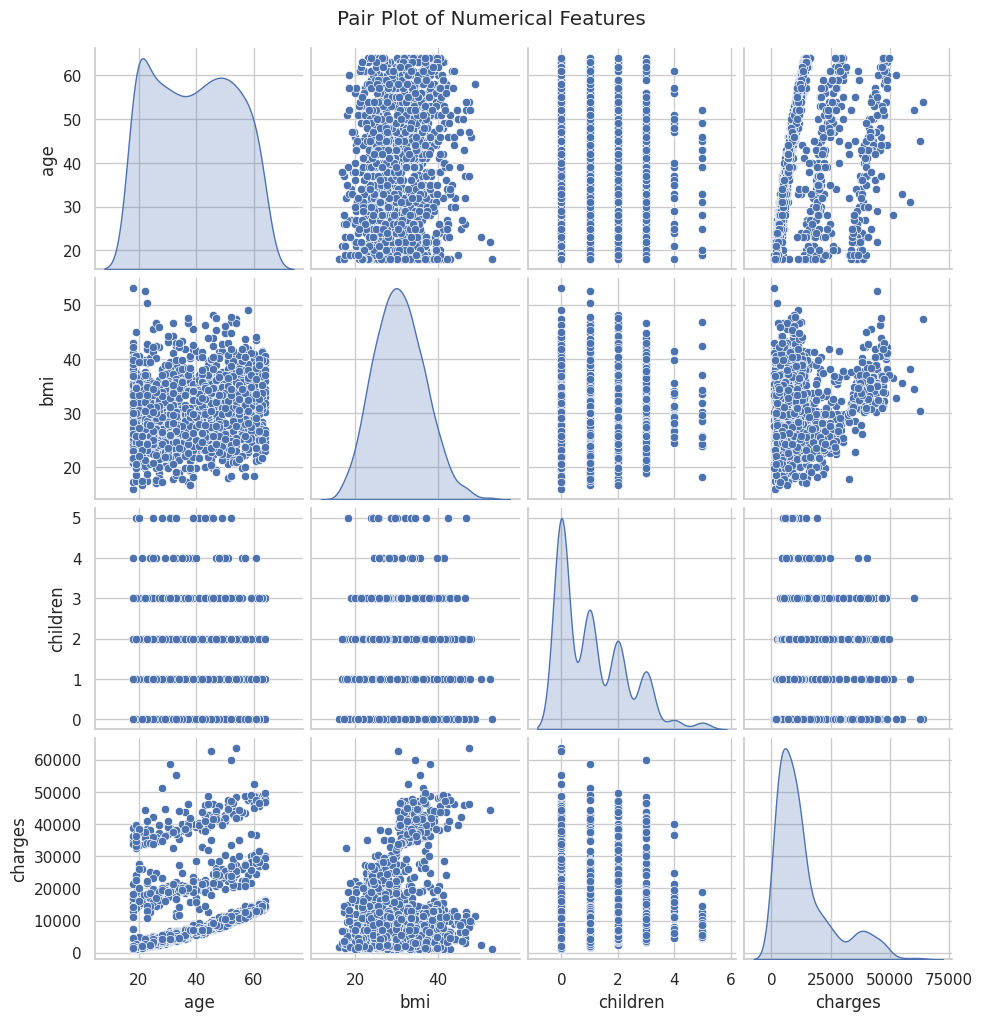

In [14]:
# Pair plot for numerical features
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

The pair plot provided a comprehensive view of relationships between multiple numerical variables:

It visually confirmed the positive correlation between age and charges.

It also highlighted relationships between other features (like BMI and charges), indicating potential interactions that could be explored further in modeling.

## 4. Outlier Detection

Box Plot for Medical Charges

We will use a box plot to identify outliers in medical charges.

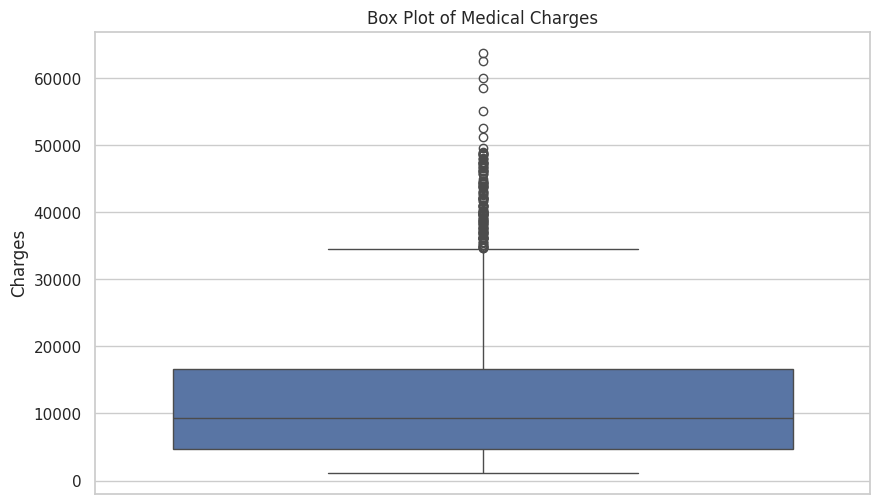

In [15]:
# Box plot for medical charges to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y='charges', data=df)
plt.title('Box Plot of Medical Charges')
plt.ylabel('Charges')
plt.show()

The box plot identified outliers in medical charges:

Several data points were found far above the upper whisker, indicating patients who incurred exceptionally high medical costs.

These outliers may represent unique cases that could skew analysis if not addressed properly. Understanding these cases could lead to insights into specific health conditions or circumstances leading to high expenses.

## 5. Feature Engineering

Binning Age into Groups

We can create age groups to simplify analysis.

In [16]:
# Create age bins
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Display the first few rows with the new age_group feature
print(df[['age', 'age_group']].head())

   age age_group
0   19     19-30
1   18      0-18
2   28     19-30
3   33     31-40
4   32     31-40


By creating categorical age groups:

The analysis can now focus on trends within defined age ranges rather than continuous values.

This simplification allows for easier interpretation and analysis when assessing how different age groups impact medical charges.

## 6. Advanced Visualization Techniques
Heatmap of Correlation Matrix

We will visualize the correlation matrix again to see how features correlate with each other.

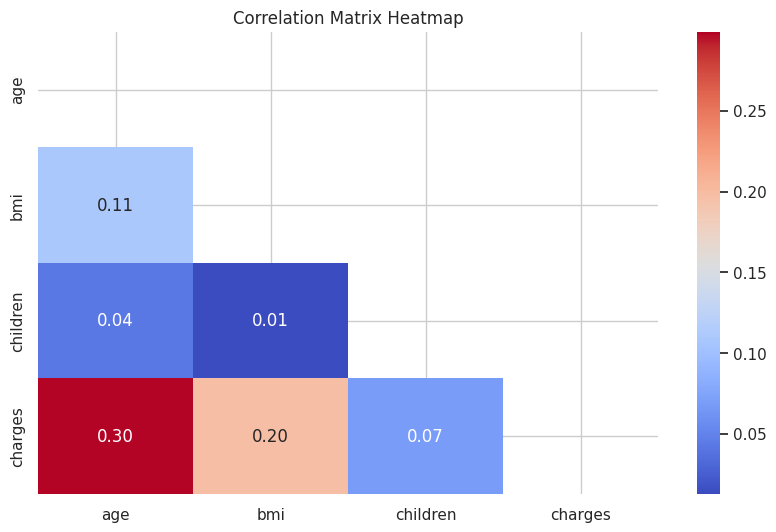

In [17]:
# Heatmap for correlation matrix with more focus on medical charges
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix Heatmap')
plt.show()

The heatmap provided a clear visual representation of correlations among all numerical features:

Strong correlations were easily identifiable, particularly between age and charges.

# Step 4: Modelling

## 1: Feature Selection and Engineering

In [18]:
# Select relevant features
features = df[['age', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']

# One-hot encode categorical variables (smoker and region)
features_encoded = pd.get_dummies(features, drop_first=True)

# Display the first few rows of the prepared feature set
print(features_encoded.head())

   age     bmi  children  smoker_yes  region_northwest  region_southeast  \
0   19  27.900         0        True             False             False   
1   18  33.770         1       False             False              True   
2   28  33.000         3       False             False              True   
3   33  22.705         0       False              True             False   
4   32  28.880         0       False              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             False  
4             False  


## 2: Data Splitting

In [20]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}')

Training set shape: (1070, 7), Testing set shape: (268, 7)


## 3: Model Selection

In [21]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_model.predict(X_test)

# Display the first few predictions
print(y_pred[:5])

[ 8960.34698464  7059.34250556 36847.63666292  9463.7058393
 26980.56380876]


## 4: Model Evaluation

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 4182.01
Mean Squared Error (MSE): 33602504.51
R-squared (R²): 0.78


## 5: Model Improvement

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display the evaluation metrics for Random Forest
print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'Random Forest - R-squared (R²): {r2_rf:.2f}')

Random Forest - Mean Absolute Error (MAE): 2473.87
Random Forest - Mean Squared Error (MSE): 20255300.47
Random Forest - R-squared (R²): 0.87


The results from the Random Forest model show significant improvements over the Linear Regression model.

## 6: Feature Importance Analysis

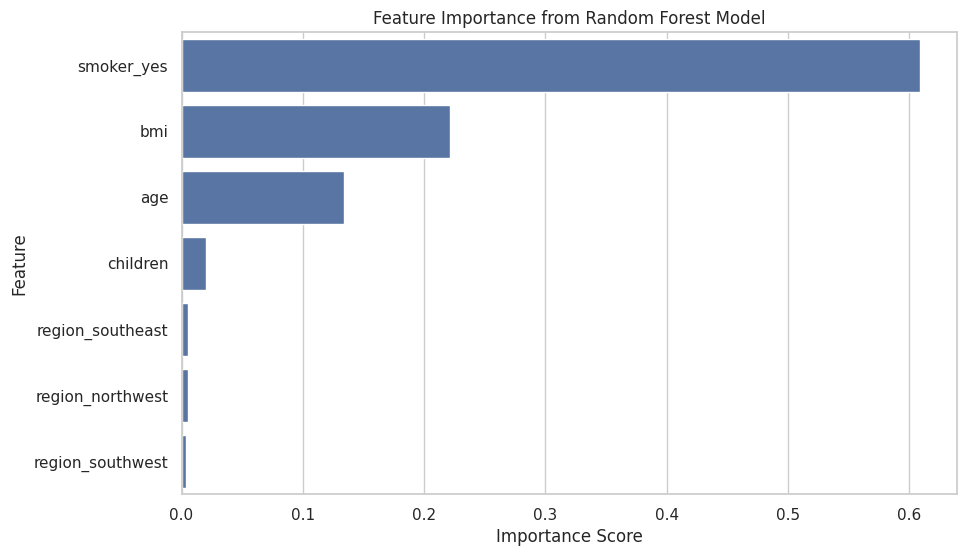

In [24]:
# Extract feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': features_encoded.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## 7: Hyperparameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Display best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.8279880542039102


## 8: Evaluate the Tuned Random Forest Model

In [26]:
# Initialize the Random Forest Regressor with the best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the model using the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics for the tuned Random Forest model
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Display the evaluation metrics for the tuned Random Forest model
print(f'Tuned Random Forest - Mean Absolute Error (MAE): {mae_best_rf:.2f}')
print(f'Tuned Random Forest - Mean Squared Error (MSE): {mse_best_rf:.2f}')
print(f'Tuned Random Forest - R-squared (R²): {r2_best_rf:.2f}')

Tuned Random Forest - Mean Absolute Error (MAE): 2604.01
Tuned Random Forest - Mean Squared Error (MSE): 19327691.82
Tuned Random Forest - R-squared (R²): 0.88


## 9: Residual Analysis

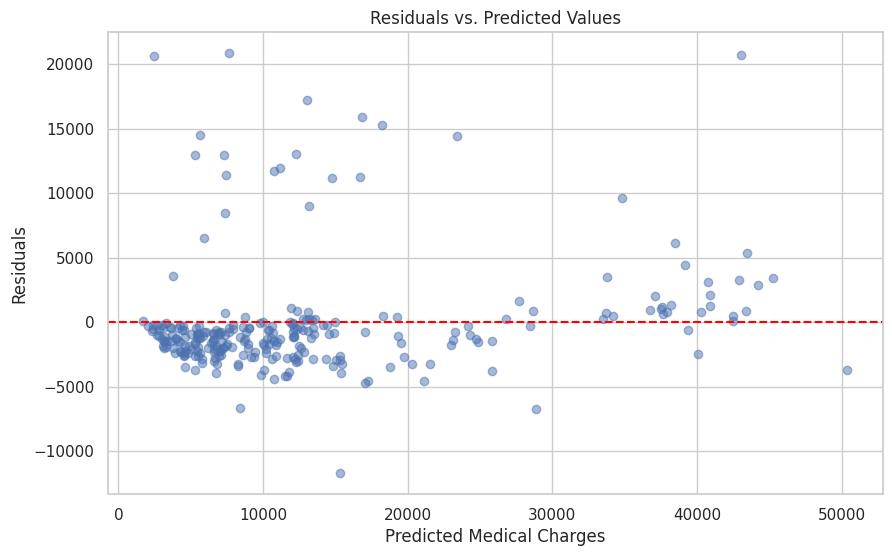

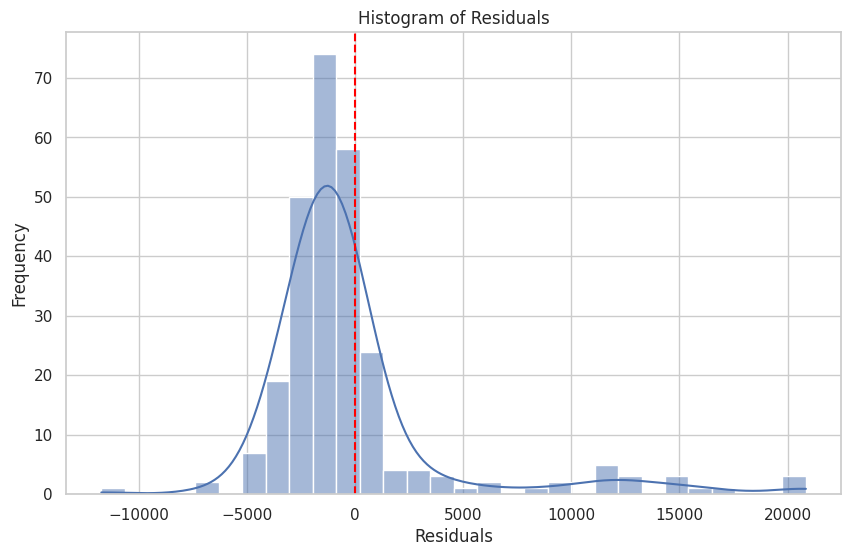

In [27]:
# Calculate residuals
residuals = y_test - y_pred_best_rf

# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best_rf, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Medical Charges')
plt.ylabel('Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

## 10: Cross-Validation Assessment

In [28]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Regressor with the best parameters
rf_model_cv = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Perform cross-validation and calculate MAE
mae_scores = -cross_val_score(rf_model_cv, features_encoded, target, cv=5, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(rf_model_cv, features_encoded, target, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model_cv, features_encoded, target, cv=5, scoring='r2')

# Display mean scores
print(f'Cross-Validated Mean Absolute Error (MAE): {mae_scores.mean():.2f}')
print(f'Cross-Validated Mean Squared Error (MSE): {mse_scores.mean():.2f}')
print(f'Cross-Validated R-squared (R²): {r2_scores.mean():.2f}')

Cross-Validated Mean Absolute Error (MAE): 2819.59
Cross-Validated Mean Squared Error (MSE): 22565919.42
Cross-Validated R-squared (R²): 0.84


## 11: Model Comparison

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model using the training data
gb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics for Gradient Boosting
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Display the evaluation metrics for Gradient Boosting
print(f'Gradient Boosting - Mean Absolute Error (MAE): {mae_gb:.2f}')
print(f'Gradient Boosting - Mean Squared Error (MSE): {mse_gb:.2f}')
print(f'Gradient Boosting - R-squared (R²): {r2_gb:.2f}')

Gradient Boosting - Mean Absolute Error (MAE): 2393.44
Gradient Boosting - Mean Squared Error (MSE): 18494539.53
Gradient Boosting - R-squared (R²): 0.88


## 12: Hyperparameter Tuning for Gradient Boosting

In [30]:
from sklearn.model_selection import GridSearchCV

# Define the Gradient Boosting Regressor
gb_model_tune = GradientBoostingRegressor(random_state=42)

# Set up the parameter grid for tuning
param_grid_gb = {
    'n_estimators': [100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 5, 10],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Set up GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model_tune, param_grid=param_grid_gb,
                               cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_gb.fit(X_train, y_train)

# Display best parameters and best score
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Cross-Validation Score:", grid_search_gb.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.8435082424686484


In [31]:
# Initialize the Gradient Boosting Regressor with the best parameters
best_gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the model using the training data
best_gb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_best_gb = best_gb_model.predict(X_test)

# Calculate evaluation metrics for the tuned Gradient Boosting model
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

# Display the evaluation metrics for the tuned Gradient Boosting model
print(f'Tuned Gradient Boosting - Mean Absolute Error (MAE): {mae_best_gb:.2f}')
print(f'Tuned Gradient Boosting - Mean Squared Error (MSE): {mse_best_gb:.2f}')
print(f'Tuned Gradient Boosting - R-squared (R²): {r2_best_gb:.2f}')

Tuned Gradient Boosting - Mean Absolute Error (MAE): 2393.44
Tuned Gradient Boosting - Mean Squared Error (MSE): 18494539.53
Tuned Gradient Boosting - R-squared (R²): 0.88


## 13: Model Comparison Recap: Random Forest vs. Gradient Boosting

In this recap, we will summarize the key differences and performance metrics of the tuned Random Forest and Gradient Boosting models based on the results obtained earlier.

Key Differences Between Random Forest and Gradient Boosting
### Model Building Approach:

*   Random Forest: Builds multiple decision trees independently and combines their outputs through averaging (for regression) or majority voting (for classification). This parallel approach helps reduce overfitting.

*   Gradient Boosting: Constructs decision trees sequentially, where each new tree focuses on correcting the errors made by the previous trees. This method can capture complex relationships but may be more prone to overfitting if not properly tuned.

### Performance:


*   In this case, the Gradient Boosting model outperformed the Random Forest model in terms of MAE and MSE, indicating better predictive accuracy on the test set.

### Hyperparameter Sensitivity:


*   Random Forest: Generally less sensitive to hyperparameters and can perform well with default settings.
*   Gradient Boosting: More sensitive to hyperparameters; careful tuning is often required to achieve optimal performance.

### Training Time:


*   Random Forest: Typically faster to train due to its parallel nature.
*   Gradient Boosting: Slower to train because it builds trees sequentially.

### Robustness to Noise:


*   Random Forest: More robust to noisy data due to its ensemble approach.
*   Gradient Boosting: Can be sensitive to noise and outliers, which may affect performance.









## 14: Final Model Deployment Preparation

### Save the Model

In [32]:
import joblib

# Save the tuned Gradient Boosting model
joblib.dump(best_gb_model, 'tuned_gradient_boosting_model.pkl')

# If you chose Random Forest, replace best_gb_model with your Random Forest model variable
# joblib.dump(best_rf_model, 'tuned_random_forest_model.pkl')

['tuned_gradient_boosting_model.pkl']

### Create a Prediction Function

In [33]:
def predict_medical_charges(input_data):
    # Load the saved model
    model = joblib.load('tuned_gradient_boosting_model.pkl')

    # Process input data (ensure it has the same structure as training data)
    # For example, if you need to encode categorical variables or scale features:
    # input_data_encoded = preprocess_input_data(input_data)

    # Make predictions
    predictions = model.predict(input_data)

    return predictions

# Example usage:
# new_data = pd.DataFrame({...})  # Replace with your new input data
# predictions = predict_medical_charges(new_data)
# print(predictions)